In [458]:
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder

In [459]:
df = pd.read_csv("Dataset/spam.csv",  encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [460]:
df.shape

(5572, 5)

#### 1. Data Cleaning

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [462]:
# Drop Last 3 Columns

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [463]:
df.sample(10)

,v1,v2
1963,ham,Yes :)it completely in out of form:)clark also...
716,spam,+449071512431 URGENT! This is the 2nd attempt ...
4820,ham,Im good! I have been thinking about you...
521,ham,Shall i come to get pickle
2644,ham,My friends use to call the same.
2542,ham,Aiyo please Ì_ got time meh.
5160,ham,Ok... Then r we meeting later?
3715,ham,Networking technical support associate.
4118,ham,Hiya do u like the hlday pics looked horrible ...
4112,ham,Thought we could go out for dinner. I'll treat...


In [464]:
# Renaming Columns

df.rename(columns={
    "v1":"target",
    "v2":"text"
}, inplace=True)

df.sample(10)

,target,text
2715,ham,Cool. I am &lt;#&gt; inches long. hope you l...
1998,ham,"Well, I have to leave for my class babe ... Yo..."
4668,ham,"When I was born, GOD said, \Oh No! Another IDI..."
370,ham,Hello my boytoy ... Geeee I miss you already a...
2642,ham,"They can try! They can get lost, in fact. Tee hee"
2904,ham,Ha. You donÛ÷t know either. I did a a clever ...
3600,ham,"Jay told me already, will do"
4466,ham,"She said,'' do u mind if I go into the bedroom..."
241,ham,PLEASSSSSSSEEEEEE TEL ME V AVENT DONE SPORTSx
1144,ham,Really... I tot ur paper ended long ago... But...


In [465]:
# label Encoding

encoder = LabelEncoder()

In [466]:
df['target'] = encoder.fit_transform(df['target'])

df.sample(10)

,target,text
58,0,Tell where you reached
5275,0,Oh yeah clearly it's my fault
5468,1,URGENT! Last weekend's draw shows that you hav...
2445,0,The guy (kadeem) hasn't been selling since the...
2475,0,Mm i am on the way to railway
2511,0,Er yep sure. Props?
4143,0,That's a shame! Maybe cld meet for few hrs tomo?
4327,1,Congrats! 2 mobile 3G Videophones R yours. cal...
449,0,10 min later k...
3848,0,U in town alone?


In [467]:
# Checking Missing Values

df.isnull().sum()

target    0
text      0
dtype: int64

In [468]:
# Check for Duplicate Values

df.duplicated().sum()

403

In [469]:
# Remove Duplicates

df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [470]:
df.shape

(5169, 2)

#### 2. EDA

In [471]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [472]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

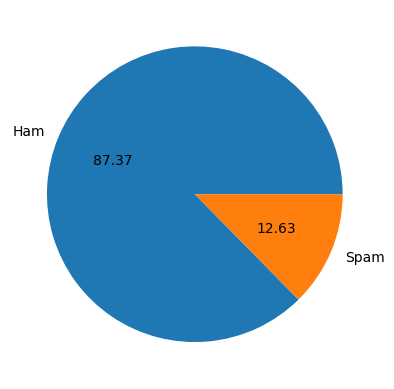

In [473]:
# Pie Chart

plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()

Data is Imbalanced

In [474]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [475]:
# Fetching Number of Characters

df['num_characters'] = df['text'].apply(len)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12772\109741788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [476]:
# Fetching Number of Words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ACER\AppData\Local\Temp\ipykernel_12772\3503966380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [477]:
# Fetching Number of Sentences

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ACER\AppData\Local\Temp\ipykernel_12772\3925254500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [478]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences
2382,0,I will reach before ten morning,31,6,1
1102,0,Black shirt n blue jeans... I thk i c Ì_...,43,12,2
754,0,Realy sorry-i don't recognise this number and ...,82,19,2
3696,1,You are a winner you have been specially selec...,159,30,3
2041,0,ÌÏ dun wan to watch infernal affair?,36,8,1
721,0,S'fine. Anytime. All the best with it.,38,10,3
2204,0,Raji..pls do me a favour. Pls convey my Birthd...,93,23,4
2972,0,Happy New Year Princess!,24,5,1
113,1,GENT! We are trying to contact you. Last weeke...,159,33,7
3553,0,am up to my eyes in philosophy,30,7,1


In [479]:
# For HAM Messages

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [480]:
# For SPAM Messages

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

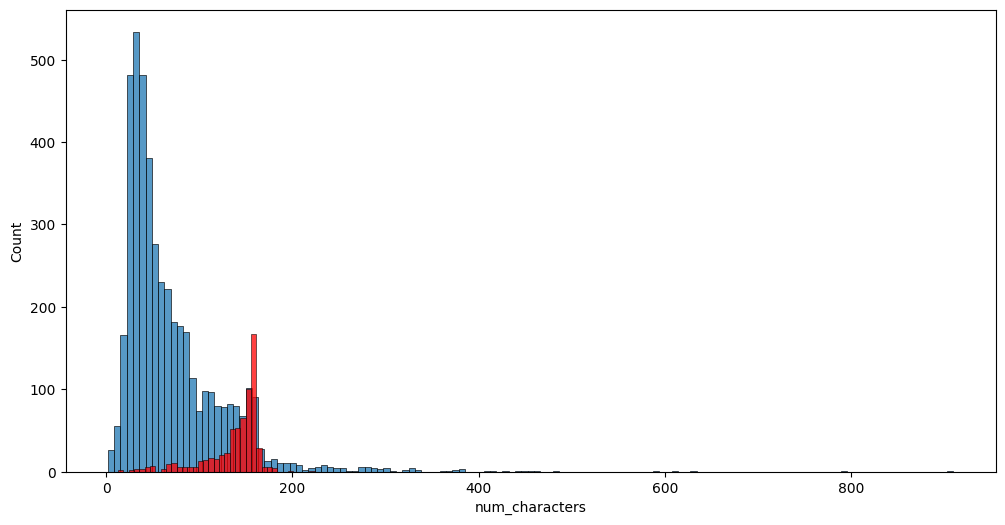

In [481]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

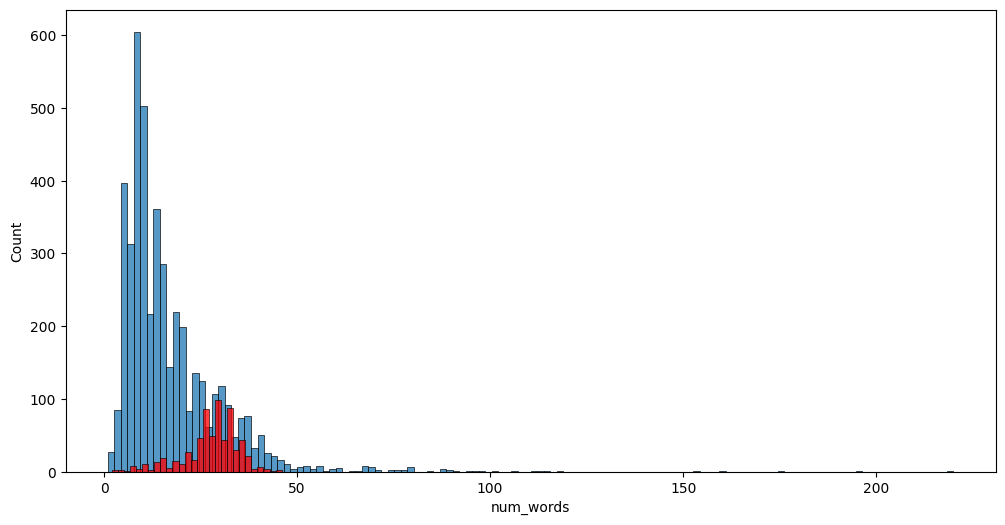

In [482]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

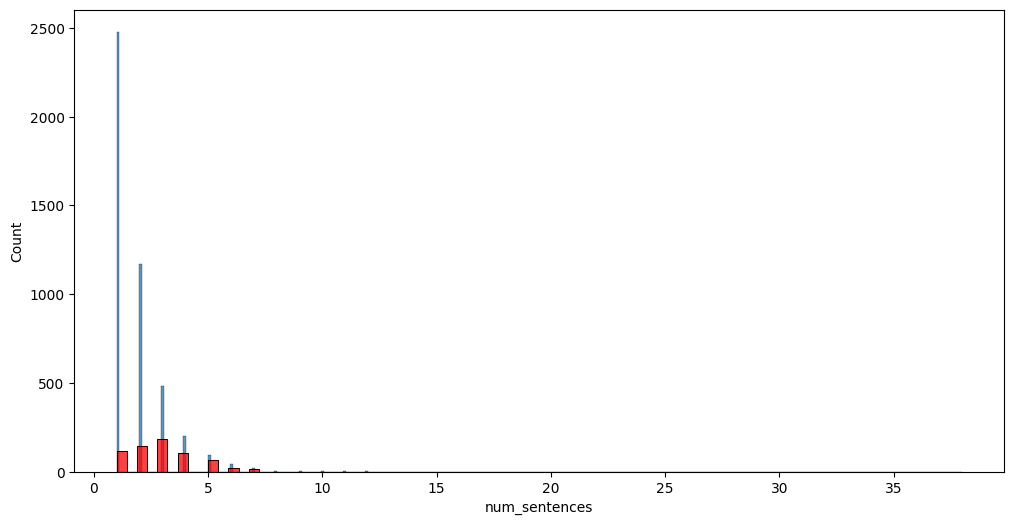

In [483]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

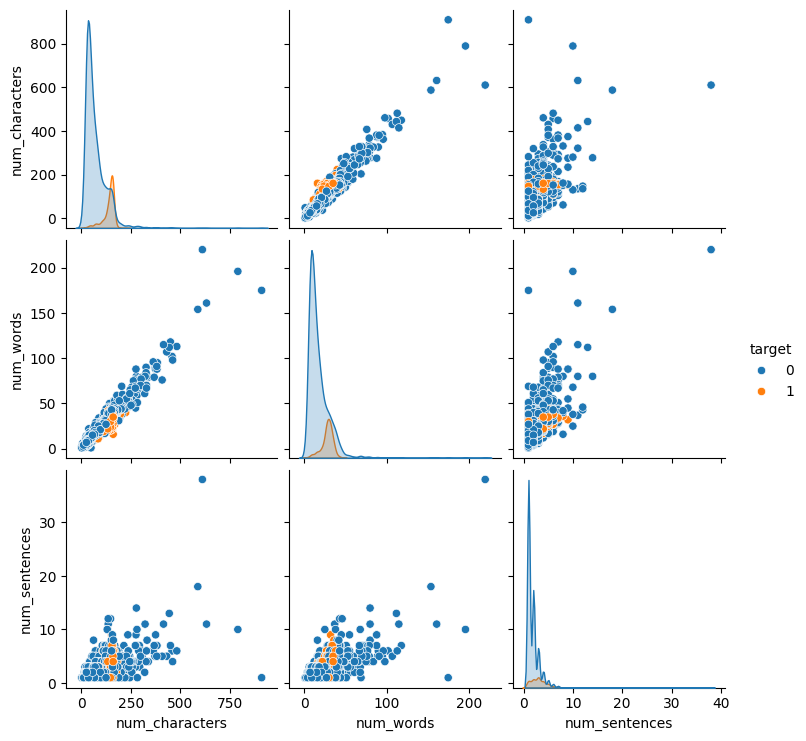

In [484]:
sns.pairplot(df, hue='target')
plt.show()

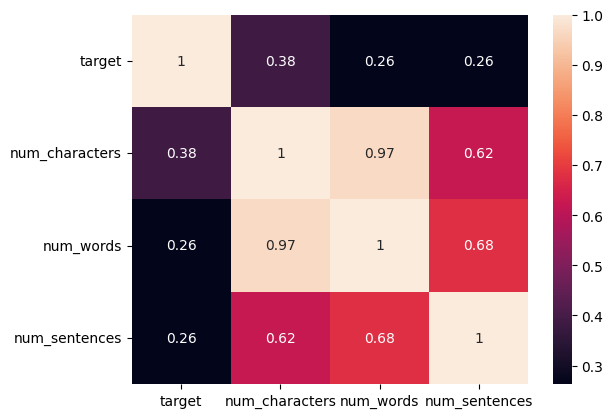

In [485]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

#### 3. Data Preprocessing

In [486]:
def transform_text(text):
    
    # Lower Case
    text = text.lower()
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Removing Stop Words and Punctuations
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # Stemming
    ps = PorterStemmer()
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) 
    
    
    return " ".join(y)

In [487]:
df['transformed_text'] = df["text"].apply(transform_text)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12772\1370377905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df["text"].apply(transform_text)


In [488]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [489]:
wc = WordCloud(width=1200, height=800, min_font_size=10, background_color='white')

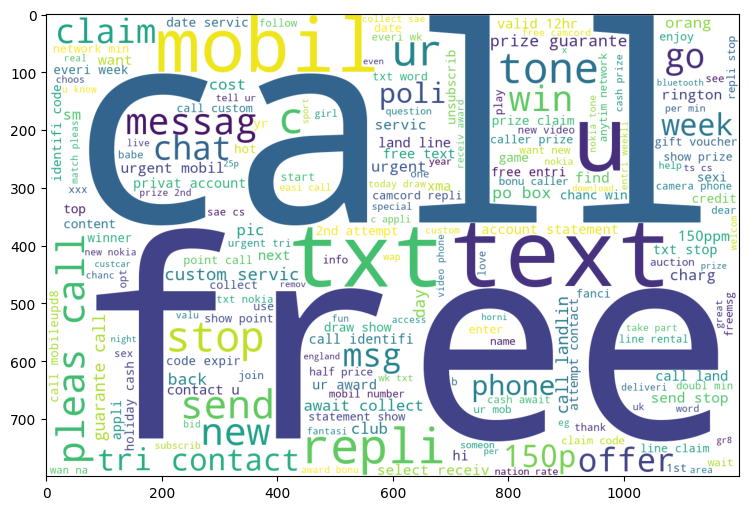

In [490]:
# WordCloud of Spam

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

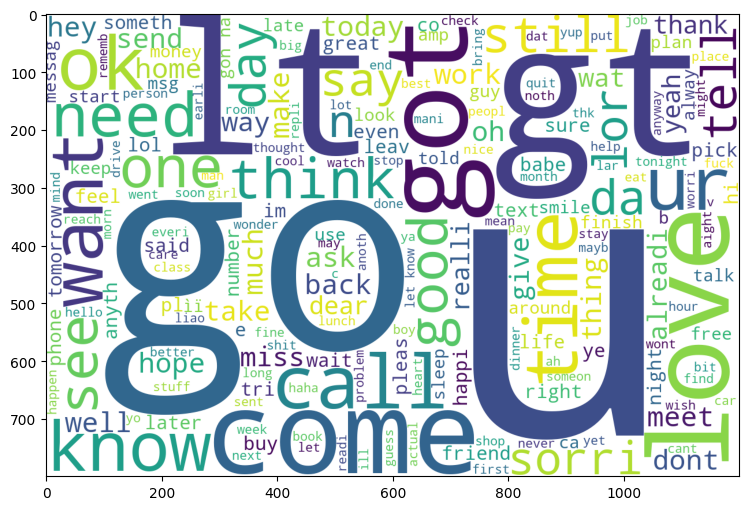

In [491]:
# WordCloud of Ham

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [492]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


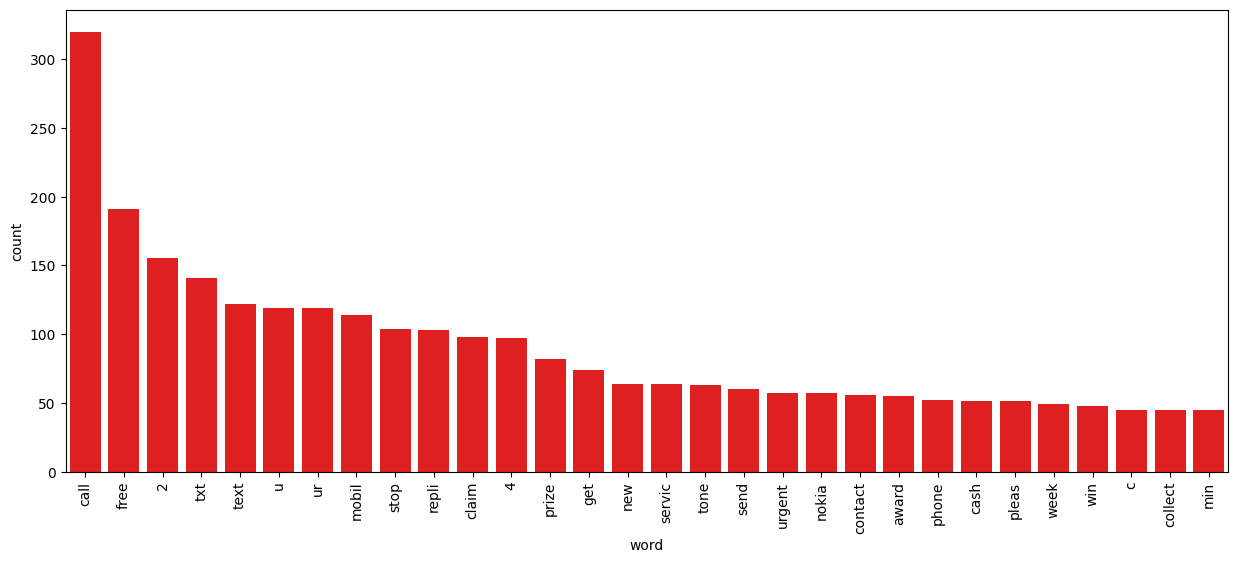

In [493]:
# Most Frequent Words for SPAM

spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Prepare data
df_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(15,6))
sns.barplot(data=df_freq, x='word', y='count', color='red')
plt.xticks(rotation=90)
plt.show()

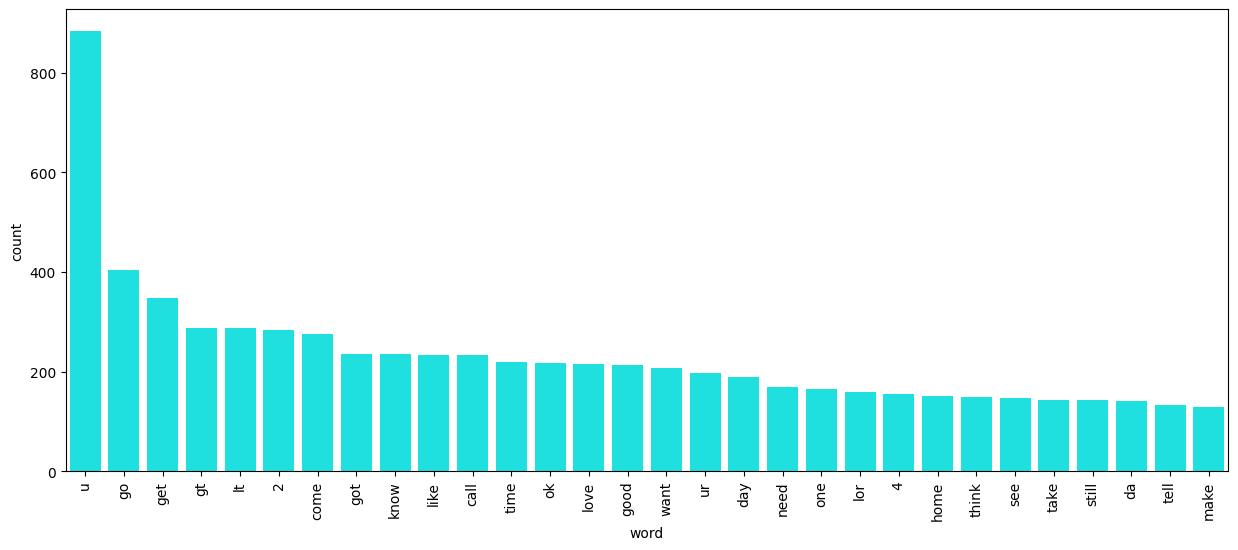

In [494]:
# Most Frequent Words for HAM

ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Prepare data
df_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(15,6))
sns.barplot(data=df_freq, x='word', y='count', color='cyan')
plt.xticks(rotation=90)
plt.show()

#### 4. Model Building

#### 5. Evaluation

#### 6. Improvements

#### 7. Website

#### 8. Deployment